# Fixed Income

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [23]:
def face(couponRate,discountRate,maturiy,faceValue = 100):
    res = faceValue*(1 + couponRate) / (1 + discountRate)**maturiy
    coupon = faceValue*couponRate
    for i in range(1,maturiy):
        res += (coupon) / (1 + discountRate )**i
    return res
def face_spot_rate(couponRate,faceValue = 100,*args):
    n = len(args)
    res = faceValue*(1+couponRate)/(1+args[-1])** n
    coupon = faceValue*couponRate
    for i in range(0,n-1):
        res += (coupon) / (1+args[i])**(i+1)
    return res

In [35]:
face(0.02,0.04,2)
face_spot_rate(0.05,100,0.03,0.04)
face_spot_rate(0.06,100,0.08,0.09,0.1)


90.24500441072213

In [15]:
def bisection(a, b ,f,tolerance):
    if f(a)*f(b)>0:
        return "No root exists in ({},{})".format(a,b)
    elif abs(f(a)) < tolerance:
        return a
    elif abs(f(b)) < tolerance:
        return b
    else:
        while abs(f((a+b)/2) )> tolerance:
            if f(a)* f((a+b)/2) <0:
                b=(a+b)/2
            if f(a)* f((a+b)/2) >0:
                a=(a+b)/2 
        return (a+b)/2
    
def yieldToMaturity(couponRate,maturity,bondPrice):
    f = lambda YTM:face(couponRate,YTM,maturity) - bondPrice
    return bisection(0, 1, f, 1.e-6)

In [16]:
print(yieldToMaturity(0.05,2,101.886))
print(yieldToMaturity(0.06,2,100))
print(yieldToMaturity(0.05,3,97.327))

0.04000049829483032
0.06000000238418579
0.05999995768070221


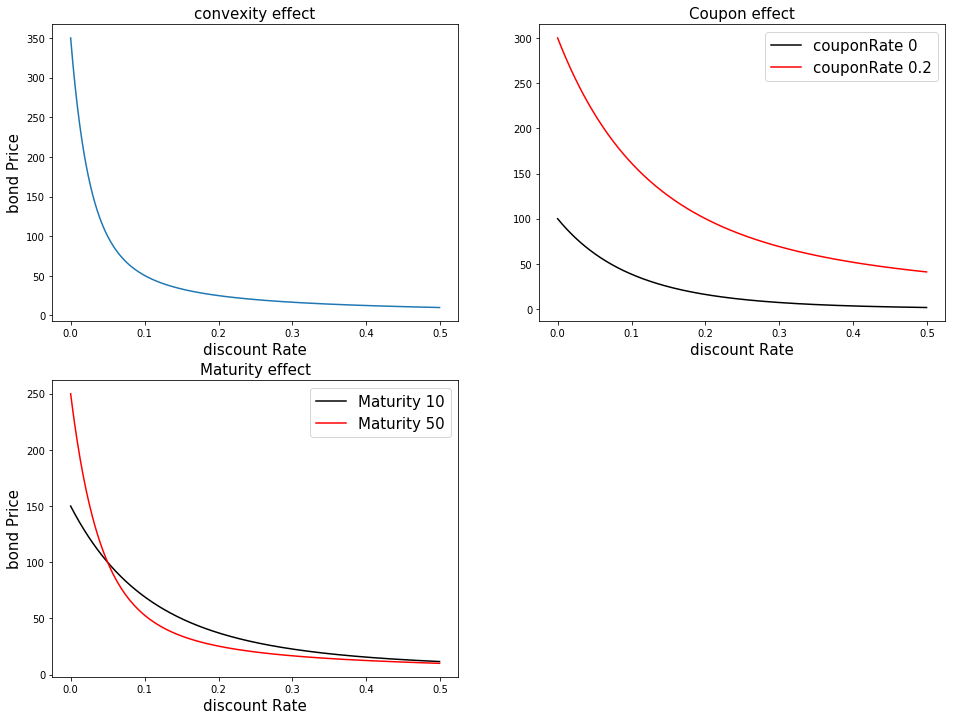

405.4077961789801
128.61954865702074


In [17]:
fig = plt.figure(figsize=(16,12))

# discount rate - bond price
ax1 = fig.add_subplot(2, 2, 1)
couponRate = 0.05
Maturity = 50
discountRate = 0.001*np.arange(500)
f = lambda r:face(couponRate,r,Maturity)
price = list(map(f,discountRate))

ax1.plot(discountRate,price)
ax1.set_xlabel("discount Rate",fontsize = 15)
ax1.set_ylabel("bond Price",fontsize = 15)
ax1.set_title("convexity effect", fontsize = 15)

#coupon effect
ax2 = fig.add_subplot(2, 2, 2)
couponRate1 = 0
couponRate2 = 0.2
Maturity = 10

discountRate = 0.001*np.arange(500)
f1 = lambda r:face(couponRate1,r,Maturity)
f2 = lambda r:face(couponRate2,r,Maturity)
price1 = list(map(f1,discountRate))
price2 = list(map(f2,discountRate))
ax2.plot(discountRate,price1,color = "black",label = "couponRate 0")
ax2.plot(discountRate,price2,color = "red",label = "couponRate 0.2")
ax2.set_xlabel("discount Rate",fontsize = 15)
ax2.legend(fontsize = 15, loc="best")
ax2.set_title("Coupon effect", fontsize = 15)


#maturity effect
ax3 = fig.add_subplot(2, 2, 3)
couponRate = 0.05
Maturity1 = 10
Maturity2 = 30
discountRate = 0.001*np.arange(500)
f1 = lambda r:face(couponRate,r,Maturity1)
f2 = lambda r:face(couponRate,r,Maturity2)
price1 = list(map(f1,discountRate))
price2 = list(map(f2,discountRate))
ax3.plot(discountRate,price1,color = "black",label = "Maturity 10")
ax3.plot(discountRate,price2,color = "red",label = "Maturity 50")
ax3.set_xlabel("discount Rate",fontsize = 15)
ax3.set_ylabel("bond Price",fontsize = 15)
ax3.legend(fontsize = 15, loc="best")
ax3.set_title("Maturity effect", fontsize = 15)

plt.show()
plt.close(fig)
print((face(0.2,0.2,10)-face(0.2,0.21,10))/0.01)
print((face(0,0.2,10)-face(0,0.21,10))/0.01)

In [18]:
yieldToMaturity(0.03,10,101)
(3+(102-101)/6)/(102+101)*2

0.031198686371100164

### float rate notes

In [19]:
def FRN(index,QM,m,DM,N,FV=100):
    res = FV/(1+(index+DM)/m)**N
    for i in range(1,N+1):
        res += ((index + QM) * FV/m) / (1+(index+DM)/m)**i
    return res

def discountMargin(PV,index,QM,m,N,FV=100):
    f = lambda DM:FRN(index,QM,m,DM,N,FV=100)-PV
    return bisection(0, 1, f, 1.e-6)
print("FRN:",FRN(0.011,0.0075,4,0.01718,20))
print("discount rate:",discountMargin(95.50,0.011,0.0075,4,20,FV=100))

FRN: 95.50025470867125
discount rate: 0.017180562019348145


## number choose problem
Game: you are asked to write down a number (between 0-100). The number is only kept to yourself. The one who is closet the half of the class average (1/2 of all the numbers of classmates) wins the game. Think carefully what number you want to write down. Special prize will be given to the winner.


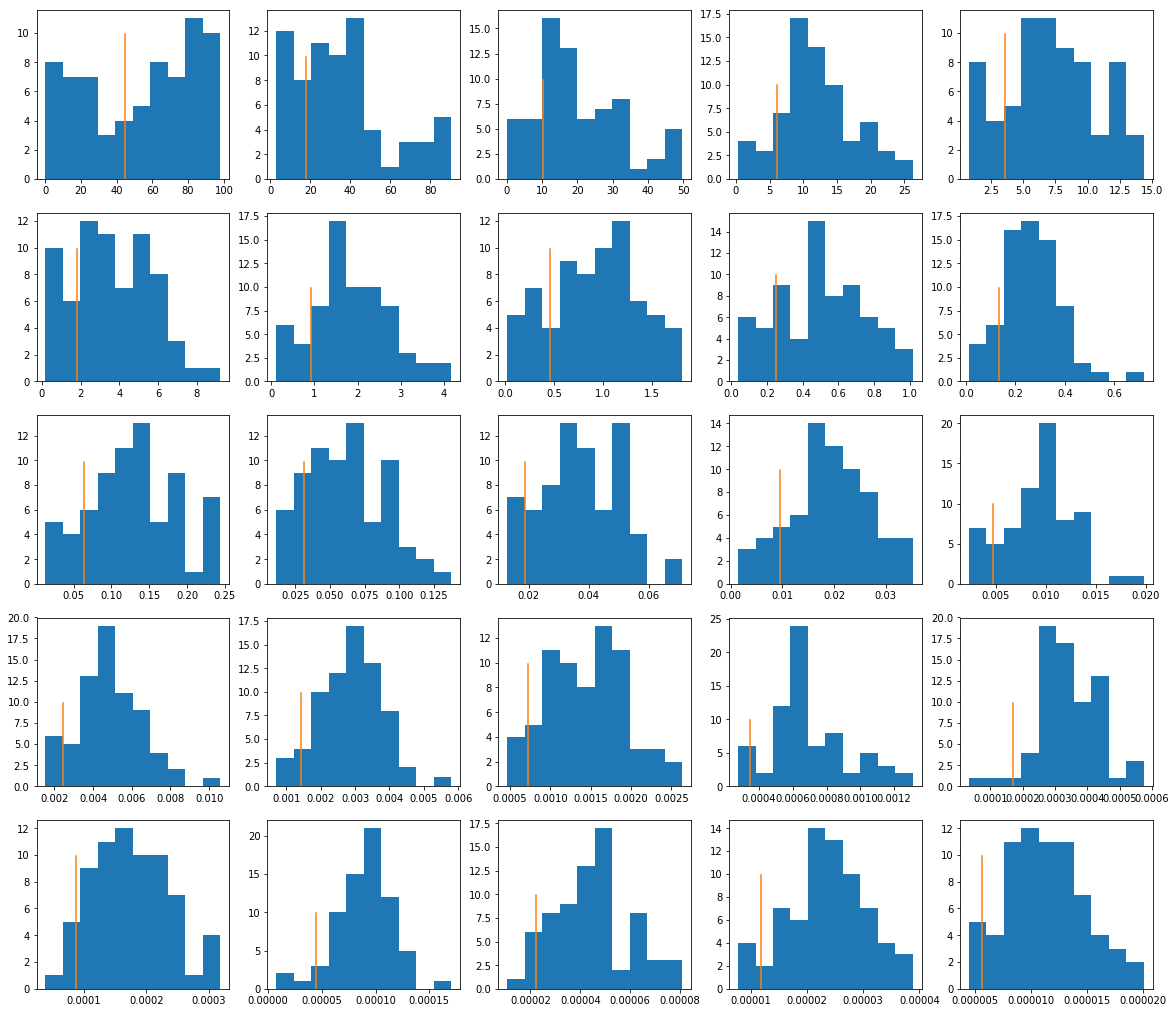

In [60]:
from scipy.stats import truncnorm
np.random.seed(190003956)
lower,upper = 0,100
order = 5
fig = plt.figure(figsize=(20,18))
sample = [np.random.randint(0,100) for i in range(70)]
ax = fig.add_subplot(order, order, 1)
ax.hist(sample)
mu = np.mean(sample)/2
sigma = np.sqrt(np.var(sample))
ax.plot(np.ones(100)*ave, np.arange(0,10,0.1))
for i in range(order**2-1):
    X = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
    sample = X.rvs(70)
    ax = fig.add_subplot(order, order, i+2)
    ax.hist(sample)
    mu=np.mean(sample)/2
    sigma = sigma/2
    ax.plot(np.ones(100)*mu, np.arange(0,10,0.1))
plt.show()
plt.close(fig)

### interes risk of fixed-income bonds: Duration
The duration of a bond measures the sensitivity of the bond’s full price
cash flow weighted average time
<strong> <br />Yield duration & Curve duration</strong>
<strong> <br />Macaulay duration & Modified duration</strong>


In [2]:
(91.25-92.25)/92.25/7.24

-0.0014972525415861892

# PD project

In [1]:
import pandas as pd
import numpy as np
from ipywidgets import interact, IntSlider
from IPython.display import display
import pdfkit as pdf

In [2]:
T1 = pd.read_excel("/Users/yifuhe/Learning/RBS/fixed_income/finalproject/LendingClubData_training.xlsx")
T2 = pd.read_excel("/Users/yifuhe/Learning/RBS/fixed_income/finalproject/LendingClubData_testing.xlsx")

In [6]:
#kaggle
#天池大数据 金融数据处理lstm

def freeze_header(df, num_rows=1000, num_columns=10, step_rows=1000,
                  step_columns=1):
    """
    Freeze the headers (column and index names) of a Pandas DataFrame. A widget
    enables to slide through the rows and columns.

    Parameters
    ----------
    df : Pandas DataFrame
        DataFrame to display
    num_rows : int, optional
        Number of rows to display
    num_columns : int, optional
        Number of columns to display
    step_rows : int, optional
        Step in the rows
    step_columns : int, optional
        Step in the columns
        
    Returns
    -------
    Displays the DataFrame with the widget
    """
    @interact(last_row=IntSlider(min=min(num_rows, df.shape[0]),
                                 max=df.shape[0],
                                 step=step_rows,
                                 description='rows',
                                 readout=False,
                                 disabled=False,
                                 continuous_update=True,
                                 orientation='horizontal',
                                 slider_color='purple'),
              last_column=IntSlider(min=min(num_columns, df.shape[1]),
                                    max=df.shape[1],
                                    step=step_columns,
                                    description='columns',
                                    readout=False,
                                    disabled=False,
                                    continuous_update=True,
                                    orientation='horizontal',
                                    slider_color='purple'))
    def _freeze_header(last_row, last_column):
        display(df.iloc[max(0, last_row-num_rows):last_row,
                        max(0, last_column-num_columns):last_column])

freeze_header(T1)

interactive(children=(IntSlider(value=1000, description='rows', max=35808, min=1000, readout=False, step=1000)…